# Sales Prediction by Advertising

#### Importing libraries

In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read csv file

In [192]:
data=pd.read_csv('Advertising.csv')

In [193]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#### Remove unwanted column

In [194]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [195]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [196]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [197]:
data.notnull().sum()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [198]:
data.shape

(200, 4)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [200]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


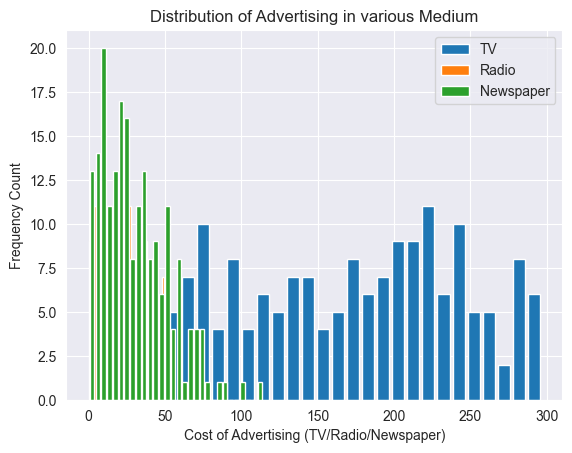

In [201]:
sns.set_style("darkgrid")
plt.hist(data['TV'],bins=30,rwidth=0.8,label='TV')
plt.hist(data['Radio'],bins=30,rwidth=0.8,label='Radio')
plt.hist(data['Newspaper'],bins=30,rwidth=0.8,label='Newspaper')
plt.title('Distribution of Advertising in various Medium')
plt.xlabel('Cost of Advertising (TV/Radio/Newspaper)')
plt.ylabel('Frequency Count')
plt.legend()

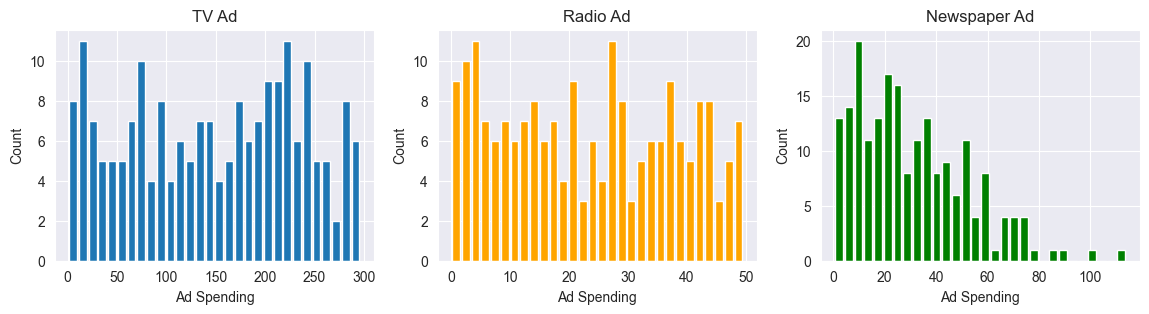

In [202]:
sns.set_style("darkgrid")
fig,axes=plt.subplots(1,3, figsize=(14,3))
axes[0].hist(data['TV'],bins=30,rwidth=0.8)
axes[0].set_title('TV Ad')
axes[1].hist(data['Radio'],bins=30,rwidth=0.8,color='orange')
axes[1].set_title('Radio Ad')
axes[2].hist(data['Newspaper'],bins=30,rwidth=0.8,color='green')
axes[2].set_title('Newspaper Ad')
for ax in axes:
    ax.set_xlabel('Ad Spending')
    ax.set_ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Sales by Ad')

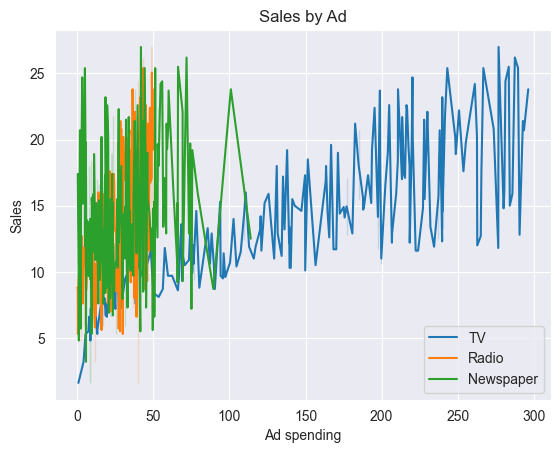

In [203]:
sns.set_style("darkgrid")
sns.lineplot(data,x="TV",y="Sales",label="TV")
sns.lineplot(data,x="Radio",y="Sales",label="Radio")
sns.lineplot(data,x="Newspaper",y="Sales",label="Newspaper")
plt.xlabel('Ad spending')
plt.title('Sales by Ad')

Text(0, 0.5, 'Sales')

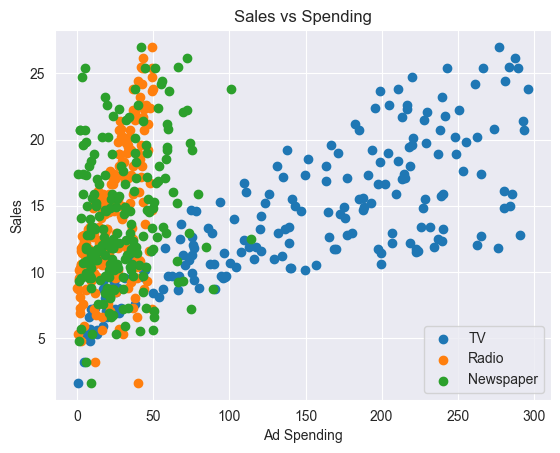

In [204]:
sns.set_style("darkgrid")
plt.scatter(data['TV'],data['Sales'],label='TV')
plt.scatter(data['Radio'],data['Sales'],label='Radio')
plt.scatter(data['Newspaper'],data['Sales'],label='Newspaper')
plt.legend()
plt.title('Sales vs Spending')
plt.xlabel('Ad Spending')
plt.ylabel('Sales')

#### Correlation 

<AxesSubplot: >

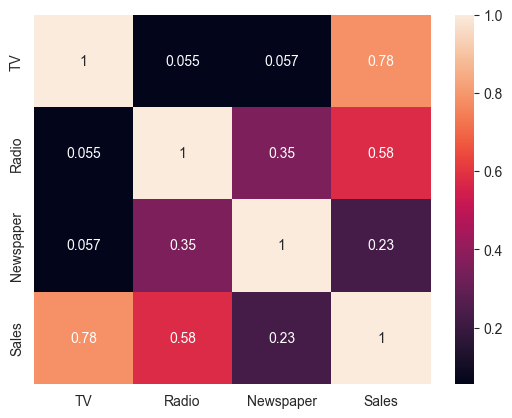

In [205]:
sns.heatmap(data.corr(),annot=True)

#### Kernel Density Estimator 

<AxesSubplot: ylabel='Count'>

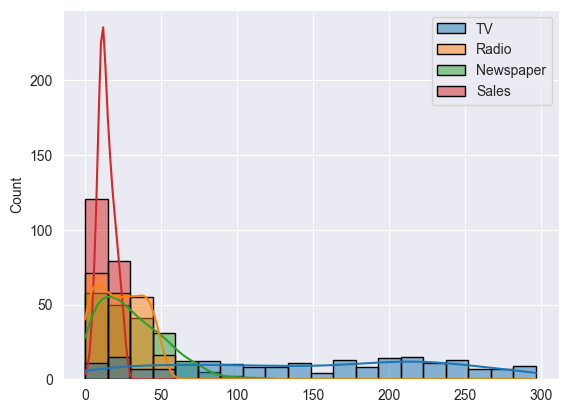

In [206]:
sns.set_style("darkgrid")
sns.histplot(data,kde=True,bins=20,color='skyblue',ec='black')

#### Feature scaling - MinMaxScaler

In [207]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [208]:
data

array([[0.77578627, 0.76209677, 0.60598065, 0.80708661],
       [0.1481231 , 0.79233871, 0.39401935, 0.34645669],
       [0.0557998 , 0.92540323, 0.60686016, 0.30314961],
       [0.50997633, 0.83266129, 0.51187335, 0.66535433],
       [0.60906324, 0.21774194, 0.51099384, 0.44488189],
       [0.02705445, 0.9858871 , 0.65699208, 0.22047244],
       [0.19208657, 0.66129032, 0.20404573, 0.4015748 ],
       [0.4041258 , 0.39516129, 0.09938434, 0.45669291],
       [0.02671627, 0.04233871, 0.00615655, 0.12598425],
       [0.67331755, 0.05241935, 0.18381706, 0.35433071],
       [0.2211701 , 0.11693548, 0.21020229, 0.27559055],
       [0.72370646, 0.48387097, 0.03254178, 0.62204724],
       [0.07811972, 0.70766129, 0.5769569 , 0.2992126 ],
       [0.32735881, 0.15322581, 0.06068602, 0.31889764],
       [0.68785932, 0.66330645, 0.40193492, 0.68503937],
       [0.65843761, 0.96169355, 0.46262093, 0.81889764],
       [0.22691917, 0.73790323, 1.        , 0.42913386],
       [0.94927291, 0.7983871 ,

#### Linear Regression

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

#X=data[['TV','Radio','Newspaper']]
#y=data['Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

print("Model R^2 Score:",model.score(X_test,y_test))




Model R^2 Score: 0.8609466508230368
